### Часть 1: исследуем зависимость от стратегии начальной реализации.
Реализовано 4 стратегии:<br>
1) *KMeans++*<br>
2) *Стратегия равномерного распределения*: Область, в которой находятся точки, разбивается на m прямоугольников так, чтобы m было максимально близко к заданному количеству кластеров k (но не меньше его). Затем среди этих прямоугольников случайным образом выбираются k, и в качестве начальных центров для кластеров определяются центры этих прямоугольников.<br>
3) *Стратегия случайных чисел*: Находим промежутки по каждой оси ([x<sub>0</sub>, x<sub>1</sub>] по абсцисс, [y<sub>0</sub>, y<sub>1</sub>] по ординат), в пределах которых расположены заданные точки. Затем k раз выбираем два случайных числа на отрезках [x<sub>0</sub>, x<sub>1</sub>] и [y<sub>0</sub>, y<sub>1</sub>]. Они станут начальными координатами центров для кластеров.<br>
4) *Стратегия выбора из данных точек*: Выбираем k точек из предложенных случайным образом.<br><br><br>
N = 100 (количество точек)<br>
K = 4 (количество кластеров)<br>
Заданное для KMeans количество кластеров **совпадает** с заданным для make_blobs.

In [1]:
from mylib import *

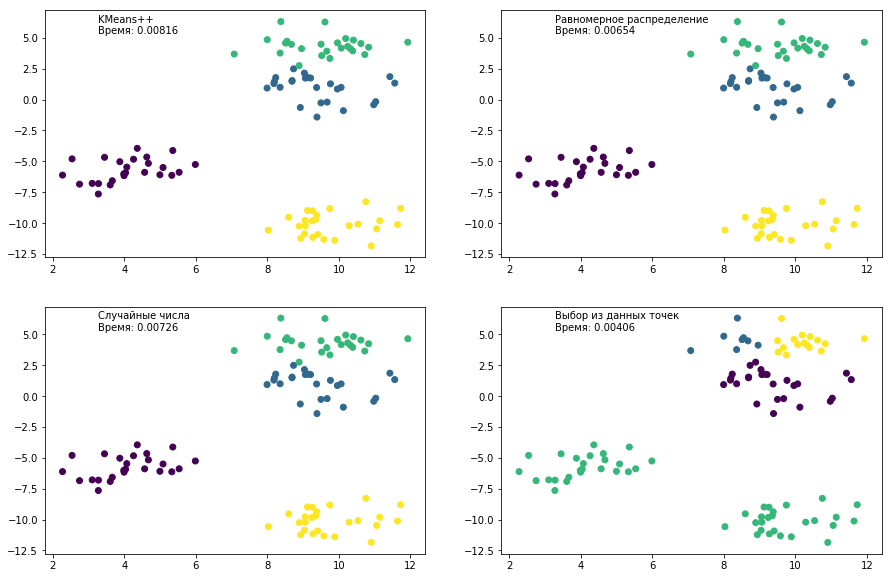

In [2]:
show_strats(100, 4, 4)

N = 100 <br>
K = 4 <br>
Заданное для KMeans количество кластеров **не совпадает** с заданным для make_blobs.

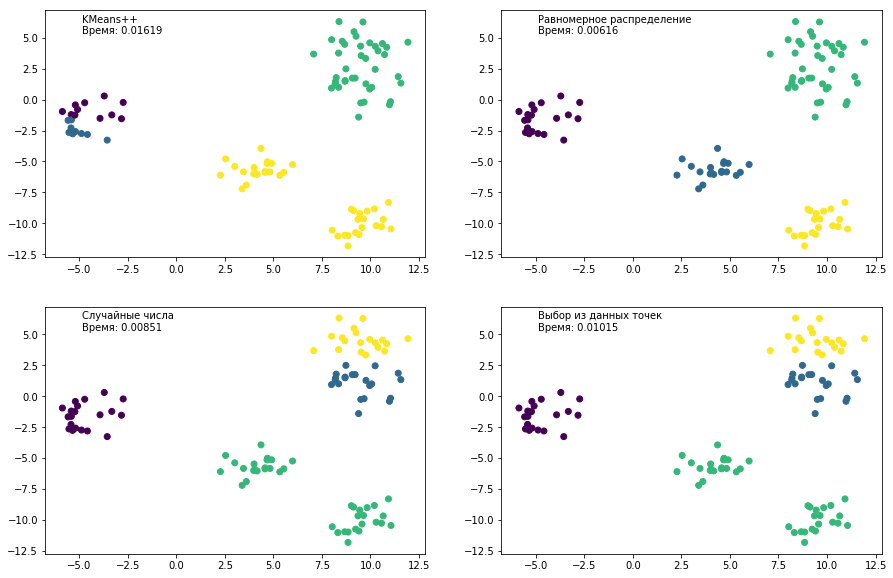

In [3]:
show_strats(100, 4, 5)

N = 1000 (количество точек) <br>
K = 4 (количество кластеров) <br>
Заданное для KMeans количество кластеров **совпадает** с заданным для make_blobs.

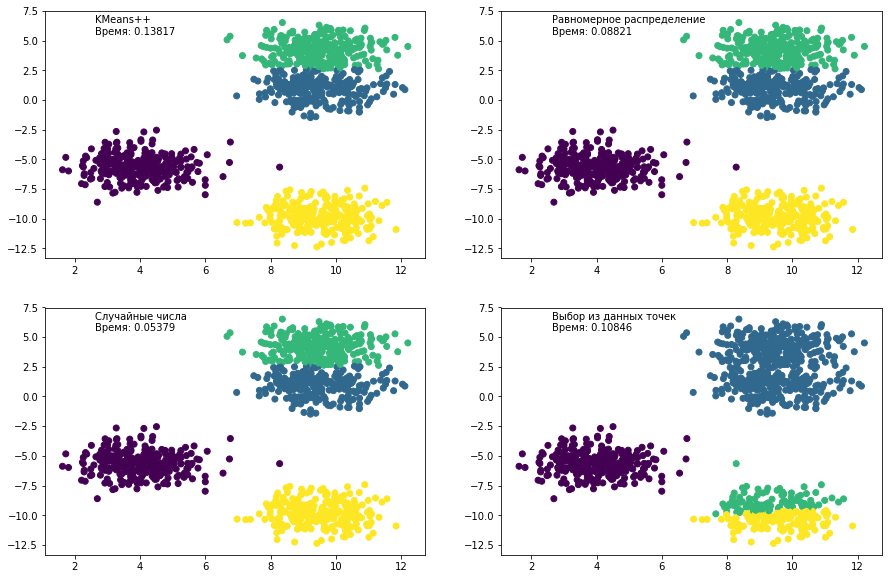

In [4]:
show_strats(1000, 4, 4)

N = 1000 <br>
K = 4 <br>
Заданное для KMeans количество кластеров **не совпадает** с заданным для make_blobs.

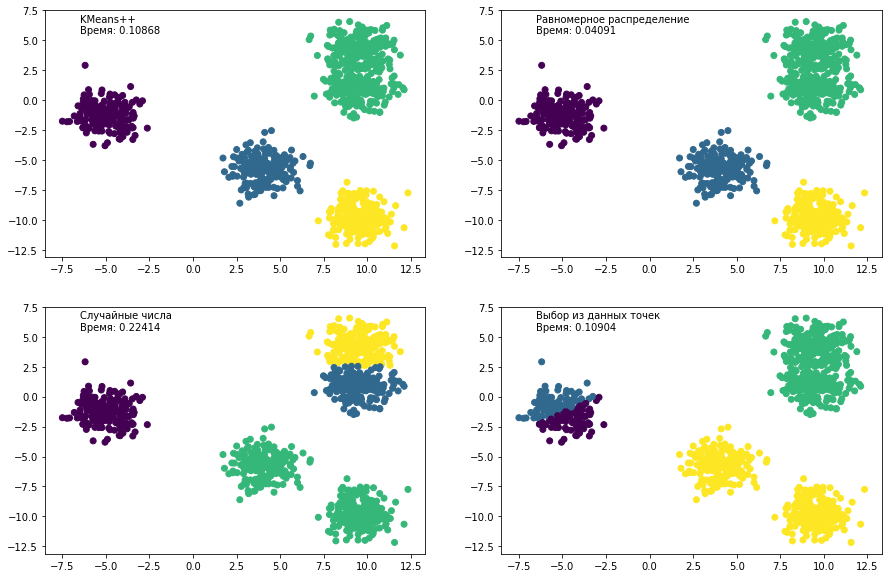

In [5]:
show_strats(1000, 4, 5)

Анализ скорости и точности методов начальной инициализации (по сравнению с библиотечной функцией sklearn.cluster.KMeans)

In [6]:
tests = np.array(((100, 3), (1000, 4), (900, 3), (1400, 6), (5000, 8), (600, 5), (1999, 7)))
times, accurs = strats_compar(gen_tests = False, tests = tests)
pd.DataFrame(times, index = tuple(tests))

,plusplus,uniform,random,choice
"(100, 3)",0.541963,0.380072,0.344243,0.657469
"(1000, 4)",7.295028,3.428365,6.541024,2.543536
"(900, 3)",2.551004,2.639652,3.041548,18.252779
"(1400, 6)",6.315174,15.349452,5.415679,3.998558
"(5000, 8)",38.174751,17.668581,27.836477,6.674305
"(600, 5)",3.494551,3.636362,8.116760,3.602649
"(1999, 7)",16.715914,11.277121,22.045588,23.063421


In [7]:
pd.DataFrame(accurs, index = tuple(tests))

,plusplus,uniform,random,choice
"(100, 3)",0.940000,0.980000,0.990000,0.940000
"(1000, 4)",0.616000,1.000000,0.646000,0.999000
"(900, 3)",1.000000,1.000000,1.000000,1.000000
"(1400, 6)",0.427857,0.995714,0.174286,1.000000
"(5000, 8)",0.456000,0.436800,0.433600,0.623000
"(600, 5)",0.691667,0.453333,0.976667,0.595000
"(1999, 7)",0.997999,0.493747,1.000000,0.222611


Сравнение скорости и точности работы KMeans при разных стратегиях инициализации при n = 100, k = 3.

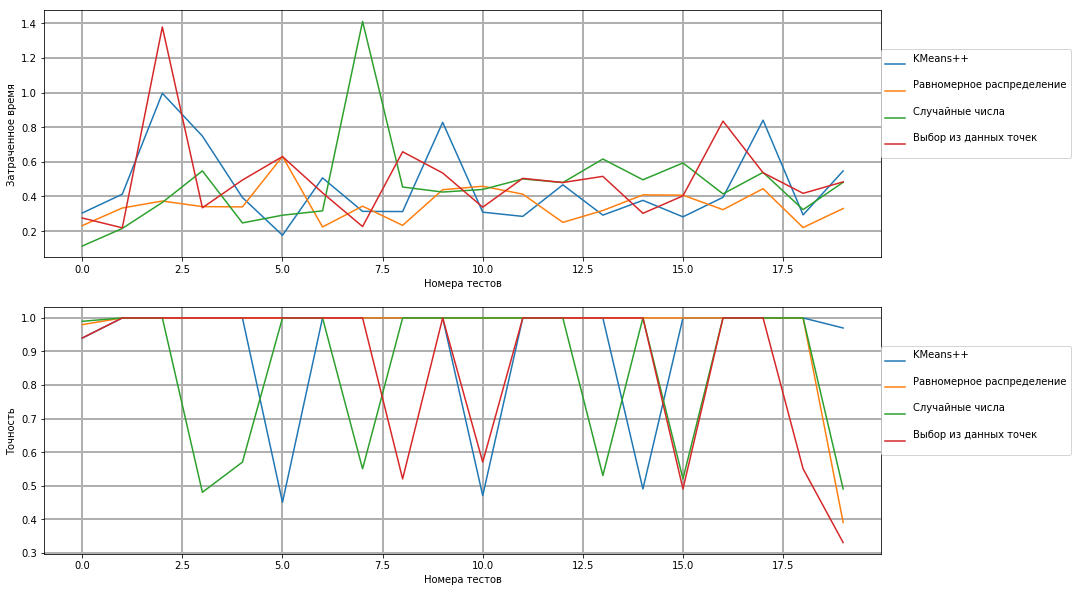

In [8]:
t, a = init_t_and_a_arr(20 * 3)
t[:20], a[:20] = strats_compar(3, 100, 20)

Сравнение скорости и точности работы KMeans при разных стратегиях инициализации при n = 1000, k = 4.

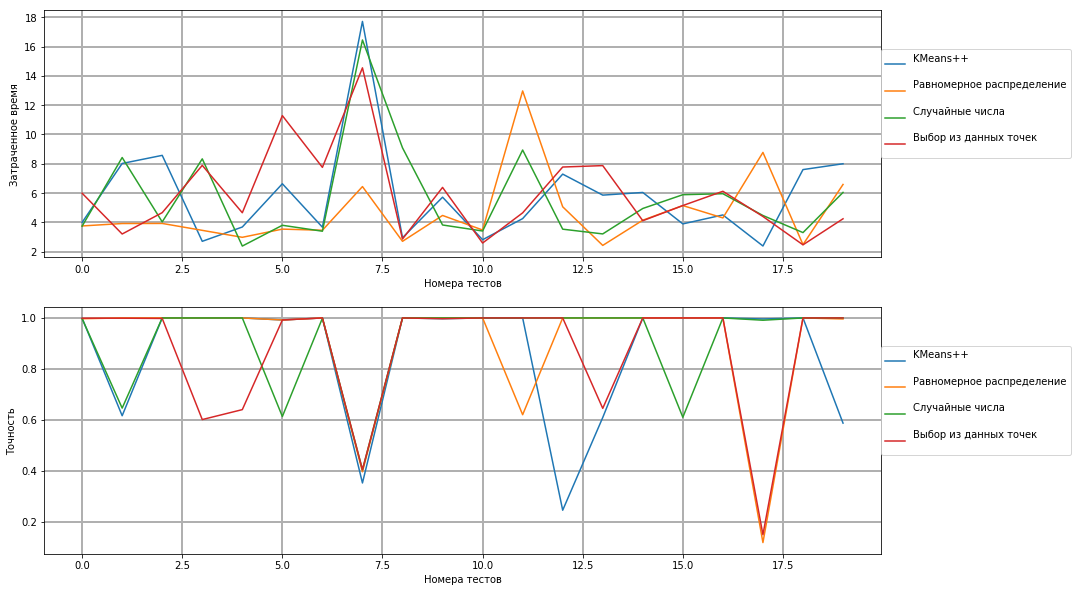

In [9]:
t[20:40], a[20:40] = strats_compar(4, 1000, 20)

Сравнение скорости и точности работы KMeans при разных стратегиях инициализации при n = 10000, k = 4.

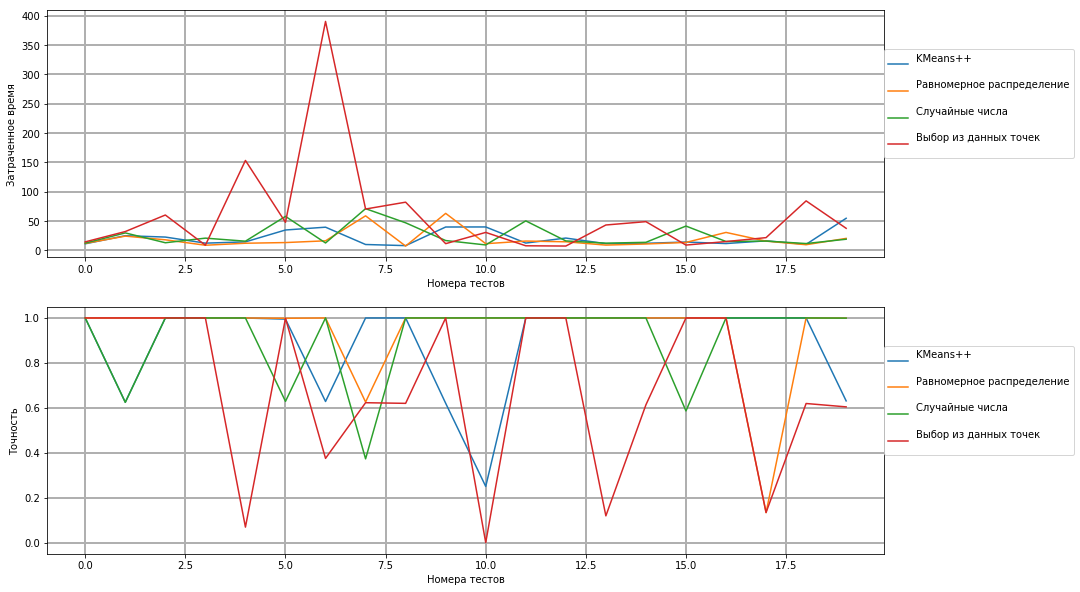

In [10]:
t[40:], a[40:] = strats_compar(4, 10000, 20)

In [11]:
for i in range(len(strats)):
    print(msg[i], "Среднее превышение времени:", "%.4f" % np.mean(t[strats[i]]) + "; Средняя точность:", "%.4f" % np.mean(a[strats[i]]) + ";")
    

KMeans++
 Среднее превышение времени: 9.1610; Средняя точность: 0.8910;
Равномерное распределение
 Среднее превышение времени: 8.1531; Средняя точность: 0.9374;
Случайные числа
 Среднее превышение времени: 10.4431; Средняя точность: 0.8933;
Выбор из данных точек
 Среднее превышение времени: 21.7949; Средняя точность: 0.8099;


Как показывает подсчет средних значений, стратегия равномерного распределения показывает наилучшие результаты по времени и точности. Далее для других испытаний будем использовать эту стратегию.